# Background

The following notebook presents the steps involved in and the thought process we used in predicting house prices based on multiple features using regression analysis. We were presented with a dataset preprocessed for instructional purposes and derived from the dataset provided in the former Kaggle competition to predict housing sale price using regression.

King County is home to the largest and fifth largest city in Washington State, namely Seattle and Bellevue, which in conjunction with the third largest city Tacoma forms the Seattle metropolitan area.

If you would like to explore the original dataset on Kaggle, please follow the link below:
https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/92376

We have provided the names and descriptions of the columns in the provided King County dataset:
* **id** - unique ID for a house
* **date** - Date day house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - Whether house has a view to a waterfront
* **view** - Number of times house has been viewed
* **condition** - How good the condition is (overall)
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house (apart from basement)
* **sqft_basement** - square footage of the basement
* **yr_built** - Year when house was built
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip code in which house is located
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# **Business Questions**

Our client representing a cohort of foreign investors has expressed interest in becoming involved in the Seattle area housing market.  By gaining better insight into the prediction models for housing prices, they hope to become major players in the market.  They have partnered with us to learn how applying supervised machine learning analysis to predict housing prices in the King County. 

We set out to answer a few questions for our client:

1. Do renovated properties have a higher selling price than unrenovated properties?
2. Does the number of times a property is viewed have any effect on selling price?
3. Does the grade given to the housing unit have an overall effect on the selling price?

Through the use of statistical tests during our EDA process, we will be able to provide the essential information needed for our clients in their new business venture.

# **Exploratory Data Analysis**

The following notebook presents the steps in predicting house pries based on multiple features using regression analysis. We used a dataset of house sales in King County, which includes the city of Seattle and the metropolitan area, processed for instructional purposes from the original Kaggle dataset. We will apply the techniques of exploratory data analysis (EDA) to familiarize ourselves with the dataset.

By performing an EDA, we are able to explore the relationship(s), or lack thereof, between the features and the target and amongst the feature variables themselve. We are better equipped through this process to identify features for analysis and filter out those without any correlation with our target variable. This process is also integral to identifying outliers, missing values, or anomalous values due to human error due to data visualization.

In [1]:
# import packages for data cleaning and processing  
import pandas as pd
import numpy as np
from datetime import datetime

# import visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

# import packages and modules for statistical analysis
from scipy import stats
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# import modules for preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

# import module for linear regression 
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# import module for test-train split
from sklearn.model_selection import train_test_split

# import feature selection modules
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV

# import module for object serialization
import pickle

# set display options for Pandas dataframes to allow view of a maximal number of columns and rows
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
# Read CSV file into notebook
df = pd.read_csv('data/kc_house_data_train.csv', index_col=0)

In [3]:
# get dimensions of the dataframe
df.shape

(17290, 21)

In [4]:
# Display first 5 rows of dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [5]:
# Display last 5 rows of dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028
17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,0,4,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910


In [6]:
# Get descriptive analytics of dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


**Initial Observations:**

- *waterfront* is a binary discrete variable (0 = not waterfront, 1 = waterfront)
- *sqft_above* + *sqft_basement* = *sqft_living*
- *sqft_basement*, *view*, and *yr_renovated* have many zero values, potentially express them as binary variables
- the oldest home was built in 1970 and the newest in 2015

We can assign our categorical and continuous variables:

- **categorical variables:**  *floors, view, grade, zipcode, bathrooms, bedrooms, condition*
- **continuous variables:** *price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15*


In [7]:
# Look for any column types that need conversion
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## **Initial Data Cleaning**

In [8]:
# Check for any null values in the dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Since the data was preprocessed, this steps are more pro forma.  We did not expect to produce any duplicate or missing values from this dataset, as would be expected from more raw data, i.e. directly from Kaggle.  These would be necessary steps in the preprocessing stage of the data.

In [9]:
# Put features into categorical and continuous subsets
feat_cat = df[['view', 'condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms', 'zipcode']]
feat_con = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long']]

In [10]:
# Get indices of the subsetted columns to prepare for Seaborn visualizations
col_con = feat_con.columns
col_cat = feat_cat.columns

## Target Variable Visualization

In [11]:
# fig, ax = plt.subplots(figsize=(12, 4))
# ax = sns.boxplot(df.price)
# plt.savefig("df_target_2.png")

<img src="images/df_target_2.png">

**Observations:**

- We could use this boxplot to identify outliers, but there are potentially different ways we could approach outliers

## **Continuous Variable Visualizations**

In [12]:
## Display distribution plots of continuous variables using FacetGrid and distplot

# con_1 = pd.melt(df, value_vars = col_con)
# g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.distplot, 'value', color='r')
# g.set_xticklabels(rotation=45)


<img src="images/df_distplot.jpg">

**Observations:**

- sqft_living, sqft_above, and sqft_living15 are skewed to the right, potentially use log transformation with skewed data to conform to normality
- sqft_lot, sqft_lot15, sqft_basement, and yr_renovated have a lot of zero values, maybe create a discrete binary variable for some of them

In [13]:
# Create scatterplots with regression line with regplot() of continuous variables

# con_2 = pd.melt(df, id_vars='price', value_vars=col_con)
# g = sns.FacetGrid(con_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.regplot, 'value', 'price', color='darkorange')
# g.set_xticklabels(rotation=45)


<img src="images/df_scatter.png">

**Observations:**

- in the case of yr_renovated, with such disparate values between no renovations as 0 values and the years having values around 2000, best to consider this as a discrete variable rather than continuous
- sqft_living and sqft_above show the strongest correlation with price
- scatterplots allow you to identify outliers
- hard to see relationship of lat, long, and yr_built to price

## Categorical Variable Visualizations

In [14]:
# Use bar graphs of the distribution of data for categorical variables

# cat_1 = pd.melt(df, value_vars=col_cat)
# g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.countplot, 'value', color='g')
# g.set_xticklabels(rotation=90)


<img src="images/df_countplot.png">

**Observations:**

- large number of zero values for waterfont and view
- bedrooms and bathrooms have right-skewed data

In [15]:
# Create scatterplots for categorical variables to observe any relationships

# cat_2 = pd.melt(df,id_vars='price', value_vars=col_cat)
# g = sns.FacetGrid(cat_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.regplot, 'value', 'price', color='dodgerblue')
# g.set_xticklabels(rotation=90)


<img src="images/df_regplot.png">

**Observations:**

- stronger relationship: bedrooms vs. price, grade vs. price
- waterfront and view have correlation with price
- little relationship between zipcode, condition, and floor

In [16]:
# Display boxplots of categorical variables to observe any trends in the mean values of each category

# cat_3 = pd.melt(df, id_vars='price', value_vars=col_cat)
# g = sns.FacetGrid(cat_3, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
# g.set_xticklabels(rotation=90)


<img src="images/df_boxplot.png">

**Observations:**

- 33 bedrooms is an outlier, potentially replace with 3 bedrooms
- strong exponential relationship in the mean values for number of bathrooms and grade
- little correlation with mean views, perhaps express as binary variable
- potentially replace outliers with the mean for grade and bathrooms

## Looking at Correlations

In [17]:
# Correlation Matrix between all variables

# corr_matrix = df.corr()
# plt.figure(figsize=(16,12))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
# plt.show()


<img src="images/df_corr.jpg">

**Final Observations from EDA:**

1. Price has a strong correlation with sqft_living and grade
2. Price has medium correlation with bedrooms, sqft_above, sqft_living15
3. Price has low correlation with bedrooms, floors, sqft_basement, latitude
4. Price has no significant relationship with sqft_lot, yr_built, long, sqft_lot15

This will help in guiding our decision for initial feature selection in developing different models.


## **Data Cleaning**

As data scientists, we undergo the different facets of the data cleaning process to ensure that our "dirty" data does not lead to any false conclusions. To ensure the validity, completeness, and consistency of the data, we make any necessary type conversions, remove any duplicate values and outliers, impute in any missing or anomalous values, perform any scaling or transformations to reduce skewness.

In [18]:
# Reset view options
pd.set_option('display.max_rows', 20)

In [19]:
# Convert 'date' column to datetime format, rename to 'sale_date', and drop original column
df['sale_date'] = [x[:8] for x in df.date]
df.sale_date = df.sale_date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df.drop(columns='date', inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014-10-06
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014-08-21
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014-08-15
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015-03-31
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014-07-14


We want to convert sale_date into a datetime format and then drop the original date column.

In [20]:
# Drop 'id' column and check dataframe
df.drop(['id'], inplace=True, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014-10-06
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014-08-21
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014-08-15
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015-03-31
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014-07-14


The 'id' column is used to uniquely identify each property, but can be used in regression analysis.

In [21]:
# Replace anomalous bedroom values and check values in column
df.replace({'bedrooms': {33: 3}}, inplace=True)
df.bedrooms.value_counts()

3     7865
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
Name: bedrooms, dtype: int64

Upon investigation, it was highly likely that the value was recorded incorrectly and would seem more in alignment with properties with 3 bedrooms rather than 33 bedrooms, which itself is extremely anomalous.

In [22]:
df[df.bathrooms==0].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
9286,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,2014-06-24
1120,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,2014-06-12
12982,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,2014-09-18
5424,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,2015-02-05
483,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,2015-04-29
3032,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,2014-12-23
10067,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,2014-09-26
9060,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,2015-02-17


Since we cannot remove any data values from the dataset, I would replace the zero bathroom values with 0.25 since that is the bare minimum for any property.  While properties can have zero bedrooms like studios, but properties must have a bathroom.  Since we have already demonstrated that it has a strong correlation with price, we need to impute some value for the zero values.  What constitutes a quarter bathroom is a bathroom with either a sink, a shower, toilet, or bathtub.  For example, a hallway shower or fresh-up room with single sink would be a 0.25 bathroom.

In [23]:
df.replace({'bathrooms': {0: 0.25}}, inplace=True)
df.bathrooms.value_counts()

2.50    4322
1.00    3100
1.75    2431
2.25    1666
2.00    1549
        ... 
6.75       2
6.25       2
7.50       1
6.50       1
7.75       1
Name: bathrooms, Length: 30, dtype: int64

In [24]:
df[df.grade==11].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
6903,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014-06-11
3903,3850000.0,4,4.25,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748,2014-11-14
260,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810,2015-04-21
1020,3640900.0,4,3.25,4830,22257,2.0,1,4,4,11,4830,0,1990,0,98039,47.6409,-122.241,3820,25582,2014-09-11
10286,3418800.0,5,5.00,5450,20412,2.0,0,0,3,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825,2014-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,635000.0,5,3.50,4150,13232,2.0,0,0,3,11,4150,0,2006,0,98003,47.3417,-122.182,3840,15121,2015-02-06
13984,633000.0,5,2.75,3630,30570,2.0,0,0,3,11,3630,0,2000,0,98058,47.4243,-122.097,3620,41965,2014-12-19
2905,575000.0,4,2.50,4620,20793,2.0,0,0,4,11,4620,0,1991,0,98023,47.2929,-122.342,3640,20793,2014-06-24
5668,556000.0,5,2.50,3840,16905,2.0,0,0,3,11,3840,0,1991,0,98023,47.2996,-122.342,3270,12133,2014-05-23


If we investigate this top outlier that we identified through our data visualization, it immediately becomes apparent that the increase in price can be explained by the combination of any of the following: increase in sqft_living, sqft_lot, and sqft_basement, and the recent renovation.  Based on this information, it would not be considered an outlier based on that level of grade.

In [25]:
df[df.bathrooms==4.5].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
6903,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014-06-11
7823,3567000.0,5,4.5,4850,10584,2.0,1,4,3,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,2015-01-07
5293,3200000.0,7,4.5,6210,8856,2.5,0,2,5,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400,2014-05-07
16000,2945000.0,5,4.5,4340,5722,3.0,0,4,3,10,4340,0,2010,0,98107,47.6715,-122.406,1770,5250,2015-03-04
3181,2600000.0,4,4.5,5270,12195,2.0,1,4,3,11,3400,1870,1979,0,98027,47.5696,-122.090,3390,9905,2014-12-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835,482500.0,6,4.5,2940,7500,1.5,0,0,4,8,2940,0,1966,0,98034,47.7208,-122.182,2010,7500,2014-09-05
14681,460000.0,5,4.5,3100,7260,2.0,0,0,3,8,3100,0,1963,2000,98059,47.5004,-122.162,1650,7700,2015-02-25
13472,389000.0,6,4.5,3560,14010,2.0,0,0,3,7,3560,0,1989,0,98002,47.3244,-122.217,1710,11116,2015-05-06
9118,350000.0,6,4.5,3500,8504,2.0,0,0,3,7,3500,0,1980,0,98155,47.7351,-122.295,1550,8460,2014-09-17


If we pick another outlier to explore like the apparent high housing price value in the category of 4.5 bathrooms, once again, there is a substantive increase in sqft_living and sqft_lot, plus renovated. Based on analyzing these two values, I have decided not to change any apparent outliers.

# **Feature Engineering**

The goal of feature engineering is to prepare the data for the machine learning algorithms and to improve the performance of the models. We can 

In [26]:
# Create new feature to incorporate built and renovation year
df['sale_age'] = df.sale_date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
# Reset display options set in the beginning
pd.set_option('display.max_rows', 20)
# Look for anomalous values
df.sale_age.value_counts(ascending=False)

 0      418
 9      385
 11     375
 10     372
 8      370
       ... 
 112     22
 115     17
 81      15
 80      12
-1       10
Name: sale_age, Length: 117, dtype: int64

In [27]:
# Replace anomalous values
df.replace({'sale_age': {-1: 0}}, inplace=True)
df.sale_age.value_counts()

0      428
9      385
11     375
10     372
8      370
      ... 
113     23
112     22
115     17
81      15
80      12
Name: sale_age, Length: 116, dtype: int64

In [28]:
# Create binary variable for whether there has been a renovation, has a bathroom, and has been viewed
df['renovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)
# Drop original columms as well as the sale_date columns since it is in datetime format
df.drop(['yr_built', 'yr_renovated', 'sale_date', 'sqft_basement', 'view'], inplace=True, axis=1)

In [29]:
# Check for any anomalous values
print(df.basement.value_counts())
print(df.viewed.value_counts())
print(df.renovated.value_counts())

0    10484
1     6806
Name: basement, dtype: int64
0    15571
1     1719
Name: viewed, dtype: int64
0    16564
1      726
Name: renovated, dtype: int64


# Statistical Tests

We conduct our statistical tests to provide answers for our preliminary and exploratory questions about what features affect housing values.  The goal for conducting the regression models is to find what features best predict housing values.

### Question 1: Do renovated properties have a higher selling price than unrenovated properties?

To answer this question, we conduct a Welch's T-test which does not assume equal population variance to compare the means of two independent sample populations, which in this case is the mean selling price for renovated vs. unrenovated properties.



**Difference of Two Means**

$$H_o: \mu_1 = \mu_2$$  

The null hypothesis is that there is no statistically significant difference between the housing price means of the two groups, renovated and not renovated. 

$$H_a: \mu_1 \neq \mu_2$$  

The alternate hypothesis is that there is statistically significant difference between the housing price means of the two groups.




In [30]:
renovated = df[df.renovated==1]
not_renovated = df[df.renovated==0]

In [31]:
p_value = stats.ttest_ind(renovated.price, not_renovated.price, equal_var=False)[1]
print("P-value for T-Test: ", p_value)
if p_value < 0.05:
    print('We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property is renovated or not.')
else:
    print('We do not reject the null hypothesis')

P-value for T-Test:  6.478917377975333e-20
We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property is renovated or not.


### Question 2: Does whether or not a property has been viewed have any effect on selling price?

To answer this question, we also conduct a Welch's T-test to compare the means of the sample populations of viewed and not viewed.



**Difference of Two Means**

$$H_o: \mu_1 = \mu_2$$  

The null hypothesis is that there is no statistically significant difference between the housing price means of the two groups, viewed and not viewed. 

$$H_a: \mu_1 \neq \mu_2$$  

The alternate hypothesis is that there is statistically significant difference between the housing price means of the two groups.


In [32]:
viewed = df[df.viewed==1]
not_viewed = df[df.viewed==0]

In [33]:
p_value = stats.ttest_ind(viewed.price, not_viewed.price, equal_var=False)[1]
print("P-value for T-Test: ", p_value)
if p_value < 0.05:
    print('We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property has been viewed or not.')
else:
    print('Do Not Reject Null Hypothesis')

P-value for T-Test:  2.784996317762731e-131
We reject the null hypothesis, and the sample populations are statistical different. Price is correlated with whether the property has been viewed or not.


### Question 3: Does the grade given to the housing unit have an overall effect on the selling price?


**One-Way ANOVA for Variance Between Multiple Means**

$$H_o : \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5$$

Null Hypothesis is that there is no statistically significant different between the housing price means between the different grades.

$$H_a : \mu_1 \neq \mu_2 \text{ or } \mu_2 \neq \mu_3 \text{ or } \mu_1 \neq \mu_3...$$

Alternative Hypothesis is that there is statistically significant difference of the housing price means of at least one of the grades.

In [34]:
formula = 'price~grade'
lm_condition = ols(formula, df).fit()
anova_condition = sm.stats.anova_lm(lm_condition, type=2)
print('F-stat Probability: ', anova_condition["PR(>F)"][0])
if anova_condition['PR(>F)'][0] < 0.05:
    print("We reject the null hypothesis, and at least one of the sample populations is statistically different. Price is correlated with at least one of the grade categories.")
else:
    print("Do Not Reject Null Hypothesis")

F-stat Probability:  0.0
We reject the null hypothesis, and at least one of the sample populations is statistically different. Price is correlated with at least one of the grade categories.


# Feature Engineering Continued

## One-Hot Encoding/Dummy Variables


Creating dummy variables allow us to input our categorical variables into the Machine Learning models. Dummy variables only take on the value of 0 or 1 for the absence or presence of some aspect of the category that is expected to effect the outcome.

In [35]:
# Get index of the columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sale_age', 'renovated',
       'basement', 'viewed'],
      dtype='object')

In [36]:
# Grab indices of columns for creating dummy variables and create dataframe with dummy variables
dum_feat = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']]
dum_index = dum_feat.columns
# To prevent what they call the dummy variable trap (related to multcollinearity), drop one of the dummy variables
# We also drop the original categorical variable in creating the dummy variables
df_dum = pd.get_dummies(data=dum_feat, columns=dum_index, drop_first=True, prefix=['bdr', 'bth', 'flr', 'cnd', 'grd'])
df_dum.head()

,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Polynomial and Interaction Features

Polynomial features are created by raising our exisitng features by some exponent, generally not greater than 3 or 4.  Adding polynomial features helps the regression models to recognize nonlinear patterns. For instance, age is related to price in more of a parabolic function due to the higher premium placed on brand new constructions vs. vintage or historic homes, which are on opposite ends of the age spectrum.

Interaction features, however, are represented by one variable or feature multipled by another feature. The idea here is that feature A's effect on C depend on the differing values of feature B.  Let's say C is plant growth, feature A is the amount of bacteria and feature B is the amount of sunlight.  In low amounts of sunlight, a high amount of bacteria in the soil creates tall plants, let's say, but in high amounts of sunlight, that same amount of bacteria creates short plants.  Only an interaction feature would be able to express that relationship.


In [37]:
# Grab columns for polynominal and interaction features from the original dataframe without dummy variables
poly_feat = df.drop('price', axis=1)
target = df['price']
# Use SKlearn to create binomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(poly_feat)
poly_columns = poly.get_feature_names(poly_feat.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms sale_age,bedrooms renovated,bedrooms basement,bedrooms viewed,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms sale_age,bathrooms renovated,bathrooms basement,bathrooms viewed,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sale_age,sqft_lot renovated,sqft_lot basement,sqft_lot viewed,floors^2,floors waterfront,floors condition,floors grade,floors sqft_above,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors sale_age,floors renovated,floors basement,floors viewed,waterfront^2,waterfront condition,waterfront grade,waterfront sqft_above,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,waterfront sale_age,waterfront renovated,waterfront basement,waterfront viewed,condition^2,condition grade,condition sqft_above,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,condition sale_age,condition renovated,condition basement,condition viewed,grade^2,grade sqft_above,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,grade sale_age,grade renovated,grade basement,grade viewed,sqft_above^2,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above sale_age,sqft_above renovated,sqft_above basement,sqft_above viewed,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,zipcode sale_age,zipcode renovated,zipcode basement,zipcode viewed,lat^2,lat long,lat sqft_living15,lat sqft_lot15,lat sale_age,lat renovated,lat basement,lat viewed,long^2,long sqft_living15,long sqft_lot15,long sale_age,long renovated,long basement,long viewed,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 sale_age,sqft_living15 renovated,sqft_living15 basement,sqft_living15 viewed,sqft_lot15^2,sqft_lot15 sale_age,sqft_lot15 renovated,sqft_lot15 basement,sqft_lot15 viewed,sale_age^2,sale_age renovated,sale_age basement,sale_age viewed,renovated^2,renovated basement,renovated viewed,basement^2,basement viewed,viewed^2
0,4.0,2.25,2070.0,8893.0,2.0,0.0,4.0,8.0,2070.0,98058.0,47.4388,-122.162,2390.0,7700.0,28.0,0.0,0.0,0.0,16.0,9.0,8280.0,35572.0,8.0,0.0,16.0,32.0,8280.0,392232.0,189.7552,-488.648,9560.0,30800.0,112.0,0.0,0.0,0.0,5.0625,4657.5,20009.25,4.5,0.0,9.0,18.0,4657.5,220630.5,106.73730,-274.8645,5377.5,17325.0,63.0,0.0,0.0,0.0,4284900.0,18408510.0,4140.0,0.0,8280.0,16560.0,4284900.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,57960.0,0.0,0.0,0.0,79085449.0,17786.0,0.0,35572.0,71144.0,18408510.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,249004.0,0.0,0.0,0.0,4.0,0.0,8.0,16.0,4140.0,196116.0,94.8776,-244.324,4780.0,15400.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,32.0,8280.0,392232.0,189.7552,-488.648,9560.0,30800.0,112.0,0.0,0.0,0.0,64.0,16560.0,784464.0,379.5104,-977.296,19120.0,61600.0,224.0,0.0,0.0,0.0,4284900.0,202980

In [38]:
# Concatenating two dataframes together
df_model = pd.concat([df_poly, df_dum], axis=1)
df_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms sale_age,bedrooms renovated,bedrooms basement,bedrooms viewed,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms sale_age,bathrooms renovated,bathrooms basement,bathrooms viewed,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot sale_age,sqft_lot renovated,sqft_lot basement,sqft_lot viewed,floors^2,floors waterfront,floors condition,floors grade,floors sqft_above,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors sale_age,floors renovated,floors basement,floors viewed,waterfront^2,waterfront condition,...,zipcode sale_age,zipcode renovated,zipcode basement,zipcode viewed,lat^2,lat long,lat sqft_living15,lat sqft_lot15,lat sale_age,lat renovated,lat basement,lat viewed,long^2,long sqft_living15,long sqft_lot15,long sale_age,long renovated,long basement,long viewed,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 sale_age,sqft_living15 renovated,sqft_living15 basement,sqft_living15 viewed,sqft_lot15^2,sqft_lot15 sale_age,sqft_lot15 renovated,sqft_lot15 basement,sqft_lot15 viewed,sale_age^2,sale_age renovated,sale_age basement,sale_age viewed,renovated^2,renovated basement,renovated viewed,basement^2,basement viewed,viewed^2,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,4.0,2.25,2070.0,8893.0,2.0,0.0,4.0,8.0,2070.0,98058.0,47.4388,-122.162,2390.0,7700.0,28.0,0.0,0.0,0.0,16.0,9.0,8280.0,35572.0,8.0,0.0,16.0,32.0,8280.0,392232.0,189.7552,-488.648,9560.0,30800.0,112.0,0.0,0.0,0.0,5.0625,4657.5,20009.25,4.50,0.0,9.00,18.00,4657.5,220630.50,106.737300,-274.8645,5377.5,17325.00,63.0,0.0,0.0,0.0,4284900.0,18408510.0,4140.0,0.0,8280.0,16560.0,4284900.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,57960.0,0.0,0.0,0.0,7.908545e+07,17786.0,0.0,35572.0,71144.0,18408510.0,8.720298e+08,4.218732e+05,-1086386.666,21254270.0,6.847610e+07,249004.0,0.0,0.0,0.0,4.00,0.0,8.0,16.0,4140.0,196116.0,94.87760,-244.324,4780.0,15400.0,56.0,0.0,0.0,0.0,0.0,0.0,...,2745624.0,0.0,0.0,0.0,2250.439745,-5795.218686,113378.732,3.652788e+05,1328.2864,0.0,0.0000,0.0000,14923.554244,-291967.18,-9.406474e+05,-3420.536,-0.0,-0.000,-0.000,5712100.0,18403000.0,66920.0,0.0,0.0,0.0,5.929000e+07,215600.0,0.0,0.0,0.0,784.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,5.0,3.00,2900.0,6730.0,1.0,0.0,5.0,8.0,1830.0,98115.0,47.6784,-122.285,2370.0,6283.0,37.0,0.0,1.0,0.0,25.0,15.0,14500.0,33650.0,5.0,0.0,25.0,40.0,9150.0,490575.0,238.3920,-611.425,11850.0,31

# Instantiating and Fitting a Supervised Learning Model 

THere are several techniques we could use to prepare a linear regression model, including taking it to pen and paper to calculate means, standard deviations, correlations, and covariance, where our regression coefficient is covariance of X and Y (SSxy) divided by variance in X (SSxx). The intercept is the mean of the dependent variable when all the indepedent variables are zero. The coefficients are estimates of the actual population parameters The R-squared value is an indication of the goodness of fit or the amount of variance in the dependent variable that can be explained by the independent variables.

Here we employ OLS method or ordinary least squares

In [39]:
# Use scikit-learn to fit and assess new model
# We instantiate a linear regression object and fit the model to the data
lm = LinearRegression()
lm = lm.fit(df_model, target)
# We use R_squared as an indication of the fit 
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_model, target))

22142820052.66378
[ 8.87700193e+06 -4.37103770e+05 -8.04763479e+03 -1.36389864e+02
 -9.02626538e+06  6.59727551e+07 -4.91643468e+05 -1.89102760e+07
  2.44291728e+04 -4.00610633e+05  7.03501914e+07  6.72608856e+07
  3.87882253e+03  8.78729451e+01  2.64936326e+03  2.55742244e+07
 -5.02346837e+06 -3.44601864e+06 -3.34554966e+04  4.42703908e+03
 -3.18096417e+01  1.55037466e-02  2.47744850e+04  3.32006840e+03
 -5.18294663e+01  5.58828313e+02  7.22118488e+00 -2.09259132e+01
 -1.51219172e+04  4.78226243e+04  1.12776784e+01  1.33655060e-01
  3.56367333e+02 -4.41378903e+03  1.34717390e+04  4.57851535e+03
  7.01096196e+03  1.26527136e+01 -4.07467383e-01 -2.83184925e+04
  8.56951285e+04 -1.34526739e+04  1.72441338e+04 -8.74043486e-01
 -1.18634518e+02  4.75072181e+04 -7.95419224e+04  8.71732796e+00
  2.45965520e-01 -2.03969780e+00 -3.09042779e+04 -1.94225905e+04
 -2.31223524e+03 -3.00153667e-02 -3.22112814e-04 -2.80301736e+01
  8.61471338e+01  3.05631957e+01  3.92236235e+01  8.14225965e-02
 -1.667

R-values range from 0 to 1, and higher values of R^2 would be indicative of a good fit, but if the R^2 value is too high, that often can be indication of over-fitting. You are rewarded with a higher R^2 value when you include too many independent variables. THe model becomes overly customized to fit the noise in the sample than reflecting the entire population.  Overfitting decreases the model's capability to make precise predictions.



## **Train-Test Split**

### Identify features and target variable

In [40]:
df_model.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode',
       ...
       'grd_4', 'grd_5', 'grd_6', 'grd_7', 'grd_8', 'grd_9', 'grd_10',
       'grd_11', 'grd_12', 'grd_13'],
      dtype='object', length=249)

In [41]:
features = df_model
target = df['price']

### Create Train and Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=34, test_size=0.2)
print("Training Set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing Set - Features: ", x_test.shape, "Target: ", y_test.shape)

Training Set - Features:  (13832, 249) Target:  (13832,)
Testing Set - Features:  (3458, 249) Target:  (3458,)


In [43]:
lm = linear_model.LinearRegression()
lm = lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print("R^2 Score: ", lm.score(x_train, y_train))

24272714253.237556
[ 7.27681011e+06 -1.21576932e+07 -8.29215369e+03 -2.03407288e+02
 -8.94854956e+06  7.77245168e+07  5.31625621e+05 -2.12103534e+07
  3.60616954e+04 -4.16594058e+05  6.91098077e+07  8.85917938e+07
  9.52754800e+02  1.02166835e+02 -1.23059000e+05  3.46138973e+07
 -6.62664537e+06 -5.65405009e+06  3.66681889e+04  9.65275167e+03
 -3.48361980e+01 -8.87872400e-02  9.48954150e+03 -2.18744855e+04
 -6.74720244e+03  6.28098569e+03  1.24531227e+01 -6.64711436e+01
  3.40442716e+02  9.49896808e+03  6.55632164e+00  2.23183839e-01
  4.02047805e+02  9.11691545e+03  1.21540534e+04  6.84212816e+03
 -5.31368320e+04  3.68031492e+00 -3.18705706e-01 -2.69213145e+04
  9.84085640e+04 -1.72599731e+04  2.35663438e+04 -1.31617447e+00
 -1.00507616e+01  6.69050295e+04 -8.34927572e+04  1.02798196e+01
  1.36842691e-01 -1.82920824e+01 -1.02190846e+04 -1.87365691e+04
 -3.76750077e+03 -2.93435333e-02  3.03145498e-05 -2.28610232e+01
  1.41292696e+02  4.26706248e+01  2.00334891e+01  9.43129719e-02
 -3.13

### Model Performance

In [44]:
y_tr_pred = lm.predict(x_train)
tr_mae = metrics.mean_absolute_error(y_train, y_tr_pred)
tr_mse = metrics.mean_squared_error(y_train, y_tr_pred)
tr_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_tr_pred))
price_std = target.std()
print('Mean Absolute Error: ', tr_mae)
print('Mean Squared Error: ', tr_mse)
print('Root Mean Squared Error: ', tr_rmse)
print('Z-Score of Mean Absolute Error: ', tr_mae/price_std)
print('Z-Score of Root Mean Squared Error: ', tr_rmse/price_std)

Mean Absolute Error:  98099.90646567574
Mean Squared Error:  22561615673.46914
Root Mean Squared Error:  150205.24515964527
Z-Score of Mean Absolute Error:  0.2627777103493011
Z-Score of Root Mean Squared Error:  0.4023509484111223


As for what we use for regression metrics, MAE describes the typical magnitude of the residuals, where small MAE suggests model is good for prediction.
MSE is the square of the difference between actual and predicted values, and will always be larger than MAE.  The presence of outliers will contribute quadratically to the error such that large differences between actual and predicted values are punished to a greater degree.

LAstly RMSE is the square root of the variance of the residuals, which indicates the absolute fit of the model to the data. It has the same units as the target variable, where lower values indicates a better fit.  This would be the most important criterion for fit if we are working within prediction models. We often use them to compare between the training and testing model performance.

### Predicting Test Set and *comparing* model performance on training vs. test data

In [45]:
y_pred = lm.predict(x_test)
tt_mae = metrics.mean_absolute_error(y_test, y_pred)
tt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Score: ", lm.score(x_test, y_test))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error Z: ', tt_mae/price_std)
print('Root Mean Squared Error Z: ', tt_rmse/price_std)
print('Training: ', int(tr_rmse), "vs. Testing: ", int(tt_rmse))

Score:  0.7795771823217365
Mean Absolute Error: 104168.28572652407
Mean Squared Error: 31502454318.3077
Root Mean Squared Error: 177489.3076168469
Mean Absolute Error Z:  0.27903292266446117
Root Mean Squared Error Z:  0.4754360686710418
Training:  150205 vs. Testing:  177489


### Check assumptions of linear regression

We use the following steps after fitting a model to check for the assumptions of the regression model.

In [46]:
# this defines residuals as the sample estimate of the error for each observation
residuals = (y_test - y_pred)

(array([1.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 7.800e+01, 3.248e+03,
        1.150e+02, 9.000e+00, 1.000e+00, 2.000e+00]),
 array([-2993701.51758575, -2447006.25564766, -1900310.99370956,
        -1353615.73177147,  -806920.46983337,  -260225.20789528,
          286470.05404282,   833165.31598091,  1379860.57791901,
         1926555.8398571 ,  2473251.1017952 ]),
 <a list of 10 Patch objects>)

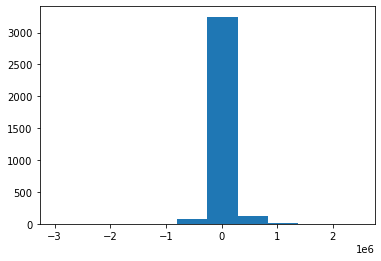

In [47]:
# This checks for the normal distribution of the residuals or error term.  By satisfying this assumption, you are able to generate more reliable confidence and prediction intervals.
plt.hist(residuals)

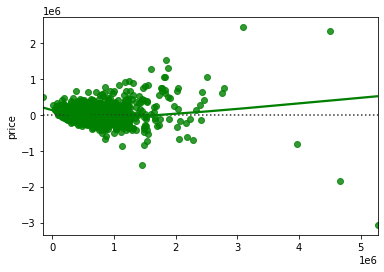

In [48]:
# We use residplot to check for heteroscedasticity, which is the case where the residuals have a non-constant variance
sns.residplot(y_pred, y_test, lowess=True, color='g')

The residuals seem normally distributed and have an equal spread around the x axis.

## **Feature Selection (K-best, recursive)**


### K-best

In [49]:

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=9, test_size=0.2)
# Instantiate the SelectKBest object and fit the training data where k is the number of features you wantr to select
sel = SelectKBest(f_regression, k=20)
sel.fit(x_train, y_train)
sel_columns = x_train.columns[sel.get_support()]
rem_columns = x_train.columns[~sel.get_support()]

In [50]:
list(sel_columns)

['sqft_living',
 'grade',
 'bathrooms sqft_living',
 'bathrooms grade',
 'bathrooms sqft_above',
 'bathrooms sqft_living15',
 'sqft_living^2',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living zipcode',
 'sqft_living lat',
 'sqft_living long',
 'sqft_living sqft_living15',
 'grade^2',
 'grade sqft_above',
 'grade zipcode',
 'grade lat',
 'grade long',
 'grade sqft_living15']

In [51]:
#instantiate a linear regression object, #fit the linear regression to the data
kbest = LinearRegression()
kbest.fit(x_train[sel_columns], y_train)
y_tr_kbest = kbest.predict(x_train[sel_columns])
trK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_tr_kbest))
y_kbest = kbest.predict(x_test[sel_columns])
ttK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
print('Training Root Mean Squared Error:' , trK_rmse)
print('Testing Root Mean Squared Error:' , ttK_rmse)

Training Root Mean Squared Error: 200210.21395163232
Testing Root Mean Squared Error: 188917.51767144466


In [52]:
list(zip(sel_columns, kbest.coef_))

[('sqft_living', -5913.893411763592),
 ('grade', -5943034.5508056525),
 ('bathrooms sqft_living', -37.810704914356556),
 ('bathrooms grade', -2748.083072368277),
 ('bathrooms sqft_above', 47.78191137880118),
 ('bathrooms sqft_living15', 17.704569873560008),
 ('sqft_living^2', 0.023313257222934907),
 ('sqft_living condition', 28.17429332927345),
 ('sqft_living grade', 54.49140659756783),
 ('sqft_living sqft_above', -0.01271513816021936),
 ('sqft_living zipcode', -0.7325764768791879),
 ('sqft_living lat', 226.0241500006532),
 ('sqft_living long', -545.3561171377199),
 ('sqft_living sqft_living15', -0.019471830964443684),
 ('grade^2', 1503.614383085214),
 ('grade sqft_above', -11.596006982381452),
 ('grade zipcode', 174.04082436085437),
 ('grade lat', 26105.685542338946),
 ('grade long', 101564.88412067437),
 ('grade sqft_living15', 9.14776710429465)]

In [53]:
print('Original: ', tt_rmse, '\n',
      "KBest:   ", ttK_rmse,'\n')

Original:  177489.3076168469 
 KBest:    188917.51767144466 



In [54]:
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
selector.fit(x_train, y_train)
selected = x_train.columns[selector.support_]
removed = x_train.columns[~selector.support_]

In [55]:
lm = LinearRegression()
lm = lm.fit(x_train[selected], y_train)
y = lm.predict(x_train[selected])
train = np.sqrt(metrics.mean_squared_error(y_train, y))
y_pred = lm.predict(x_test[selected])
test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Root Mean Squared Error:' , train)
print('Testing Root Mean Squared Error:' , test)
print("Original: ", tt_rmse, "\n",
      "KBest:   ", ttK_rmse, "\n",
      "RFE:     ", test)

Training Root Mean Squared Error: 152424.2036362322
Testing Root Mean Squared Error: 111569286.66229348
Original:  177489.3076168469 
 KBest:    188917.51767144466 
 RFE:      111569286.66229348


In [75]:
selected

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode',
       ...
       'grd_4', 'grd_5', 'grd_6', 'grd_7', 'grd_8', 'grd_9', 'grd_10',
       'grd_11', 'grd_12', 'grd_13'],
      dtype='object', length=206)

# Standardization 

When you standardize, you turn a set of previously only positive values into positive and negative values with the mean at zero and a stnadard deviation of 1.  You generally want to standardize after generating PolynomialFeatures, and dummy variables don't need to be standardized.

In [ ]:
scaler = StandardScaler()
#fit and transform the data
features = pd.DataFrame(data=scaler.fit_transform(features), columns=features.columns)

In [ ]:
features

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge


In [ ]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

# Second Run

In [72]:
df2 = df.copy()

In [73]:
df2.drop('sqft_above', axis=1, inplace=True)
df2.drop(['floors', 'condition'], inplace=True, axis=1)

In [74]:
index_dum = df2[['bedrooms', 'bathrooms', 'grade']].columns
df2_dum = pd.get_dummies(data=df2, columns=index_dum, drop_first=True, prefix=['bdr', 'bth', 'grd'])
df2_dum.head()

,price,sqft_living,sqft_lot,waterfront,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,365000.0,2070,8893,0,98058,47.4388,-122.162,2390,7700,28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,865000.0,2900,6730,0,98115,47.6784,-122.285,2370,6283,37,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1038000.0,3770,10893,0,98006,47.5646,-122.129,3710,9685,17,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1490000.0,4560,14608,0,98034,47.6995,-122.228,4050,14226,25,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,711000.0,2550,5376,0,98052,47.6647,-122.083,2250,4050,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [61]:
# Grab columns for polynominal and interaction features from the original dataframe without dummy variables
poly_feat = df2[['sale_age', 'sqft_living', 'sqft_living15', 'grade']]
target = df2['price']
# Use SKlearn to create binomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(poly_feat)
poly_columns = poly.get_feature_names(poly_feat.columns)
df2_poly = pd.DataFrame(poly_data, columns=poly_columns)
df2_poly.head()

,sale_age,sqft_living,sqft_living15,grade,sale_age^2,sale_age sqft_living,sale_age sqft_living15,sale_age grade,sqft_living^2,sqft_living sqft_living15,sqft_living grade,sqft_living15^2,sqft_living15 grade,grade^2
0,28.0,2070.0,2390.0,8.0,784.0,57960.0,66920.0,224.0,4284900.0,4947300.0,16560.0,5712100.0,19120.0,64.0
1,37.0,2900.0,2370.0,8.0,1369.0,107300.0,87690.0,296.0,8410000.0,6873000.0,23200.0,5616900.0,18960.0,64.0
2,17.0,3770.0,3710.0,11.0,289.0,64090.0,63070.0,187.0,14212900.0,13986700.0,41470.0,13764100.0,40810.0,121.0
3,25.0,4560.0,4050.0,12.0,625.0,114000.0,101250.0,300.0,20793600.0,18468000.0,54720.0,16402500.0,48600.0,144.0
4,10.0,2550.0,2250.0,9.0,100.0,25500.0,22500.0,90.0,6502500.0,5737500.0,22950.0,5062500.0,20250.0,81.0


In [62]:
# Concatenating two dataframes together
df2_model = pd.concat([df2_poly, df2_dum], axis=1)
df2_model

,sale_age,sqft_living,sqft_living15,grade,sale_age^2,sale_age sqft_living,sale_age sqft_living15,sale_age grade,sqft_living^2,sqft_living sqft_living15,sqft_living grade,sqft_living15^2,sqft_living15 grade,grade^2,price,sqft_living,sqft_lot,waterfront,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bdr_11,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,28.0,2070.0,2390.0,8.0,784.0,57960.0,66920.0,224.0,4284900.0,4947300.0,16560.0,5712100.0,19120.0,64.0,365000.0,2070,8893,0,98058,47.4388,-122.162,2390,7700,28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,37.0,2900.0,2370.0,8.0,1369.0,107300.0,87690.0,296.0,8410000.0,6873000.0,23200.0,5616900.0,18960.0,64.0,865000.0,2900,6730,0,98115,47.6784,-122.285,2370,6283,37,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,17.0,3770.0,3710.0,11.0,289.0,64090.0,63070.0,187.0,14212900.0,13986700.0,41470.0,13764100.0,40810.0,121.0,1038000.0,3770,10893,0,98006,47.5646,-122.129,3710,9685,17,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,25.0,4560.0,4050.0,12.0,625.0,114000.0,101250.0,300.0,20793600.0,18468000.0,54720.0,16402500.0,48600.0,144.0,1490000.0,4560,14608,0,98034,47.6995,-122.228,4050,14226,25,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,10.0,2550.0,2250.0,9.0,100.0,25500.0,22500.0,90.0,6502500.0,5737500.0,22950.0,5062500.0,20250.0,81.0,711000.0,2550,5376,0,98052,47.6647,-122.083,2250,4050,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,57.0,3240.0,2730.0,8.0,3249.0,184680.0,155610.0,456.0,10497600.0,8845200.0,25920.0,7452900.0,21840.0,64.0,750000.0,3240,9960,0,98008,47.5858,-122.112,2730,10400,57,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17286,66.0,1300.0,1350.0,7.0,4356.0,85800.0,89100.0,462.0,1690000.0,1755000.0,9100.0,1822500.0,9450.0,49.0,440000.0,1300,4000,0,98105,47.6687,-122.288,1350,4013,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17287,61.0,1050.0,1760.0,7.0,3721.0,64050.0,107360.0,427.0,1102500.0,1848000.0,7350.0,3097600.0,12320.0,49.0,310000.0,1050,9876,0,98028,47.7635,-122.262,1760,9403,61,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17288,43.0,1900.0,2080.0,7.0,1849.0,81700.0,89440.0,301.0,3610000.0,3952000.0,13300.0,4326400.0,14560.0,49.0,427500.0,1900,43186,0,98038,47.4199,-121.990,2080,108028,43,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [73]:
# Use scikit-learn to fit and assess new model
lm_2 = LinearRegression()
lm_2 = lm_2.fit(df2_model, target)
print(lm_2.intercept_)
print(lm_2.coef_)
print("R^2: ", lm_2.score(df2_model, target))

0.0009062119061127305
[ 1.34208838e-05 -4.95025487e-06 -8.93515519e-07  3.77426459e-07
  5.00000000e-01  1.75918137e-06  1.74071463e-06 -1.40049709e-09
  1.35680175e-07 -3.91638699e-08  3.60804798e-09  7.97261562e-14
 -3.80257768e-08 -2.19380359e-08  3.88695954e-08 -5.57530838e-09
 -2.47028822e-07 -5.22926147e-12  4.73997913e-07  4.86628697e-07
  4.17088460e-07  5.91495270e-07  3.26139116e-12 -5.74914462e-07
 -9.36905143e-07  6.90668832e-07  8.13932255e-13 -3.54212497e-07
 -5.58653465e-07 -5.70730800e-18  5.83585957e-12  4.01406686e-12
 -1.07924948e-06 -1.45447980e-06 -8.45976288e-07  5.00000000e-01
  7.18821240e-07 -4.84250084e-09 -4.34534101e-06  1.05994493e-06
 -1.91575501e-05 -3.22231656e-07 -2.82446391e-07  6.11736452e-07
 -8.94971627e-07  3.77531686e-07 -1.07669169e-06 -6.91108036e-07
  1.36293204e-07  7.33524890e-07  1.68105204e-07 -3.02890986e-07
  1.00792646e-07 -1.26000558e-06  2.23240442e-08 -1.94850434e-07
  2.74373650e-07  7.37787362e-08  3.83248222e-08  1.13891347e-08
  6

In [74]:
features = df2_model

In [75]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=34, test_size=0.2)
print("Training Set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing Set - Features: ", x_test.shape, "Target: ", y_test.shape)
lm = linear_model.LinearRegression()
lm = lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print("R^2 Score: ", lm.score(x_train, y_train))

Training Set - Features:  (13832, 99) Target:  (13832,)
Testing Set - Features:  (3458, 99) Target:  (3458,)
0.000857979990541935
[-1.72615375e-05 -4.88605888e-06  1.97809022e-08  2.86168520e-07
  5.00000000e-01  8.12360258e-07  1.74288390e-07 -1.23962837e-09
  1.20706470e-07 -3.23949044e-08 -8.73217706e-09  5.99121447e-14
 -2.93115004e-08 -1.85718553e-08  5.39457289e-08  1.11503541e-07
 -4.55314232e-07 -4.18207136e-12  4.16769478e-07  4.64894867e-07
 -3.80356281e-08  1.26249842e-07  4.04951073e-12 -2.76213857e-07
 -1.04740397e-06  1.71710237e-06  2.23765451e-13 -4.64602149e-07
 -5.52887664e-07 -4.70865615e-18  4.95856134e-12  2.85899082e-12
 -9.55086540e-07 -1.11532355e-06 -5.55541078e-07  5.00000000e-01
  5.05168927e-07 -5.14204848e-09 -4.26162428e-06  5.64339180e-07
  1.21993640e-05 -5.08172665e-07 -2.73843960e-07  1.08533546e-06
  2.02383112e-08  2.86134926e-07 -8.64908614e-07 -8.91259534e-07
  3.53830183e-07  4.90398454e-07  3.41336416e-07 -3.91249633e-07
 -1.53635838e-07  1.84305

In [76]:
y_train_pred = lm.predict(x_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()
print('Mean Absolute Error: ', train_mae)
print('Mean Squared Error: ', train_mse)
print('Root Mean Squared Error: ', train_rmse)
print('Z-Score of Mean Absolute Error: ', train_mae/price_std)
print('Z-Score of Root Mean Squared Error: ', train_rmse/price_std)

Mean Absolute Error:  2.139494814635284e-06
Mean Squared Error:  8.068935761533772e-12
Root Mean Squared Error:  2.840587221250876e-06
Z-Score of Mean Absolute Error:  5.7310100381265395e-12
Z-Score of Root Mean Squared Error:  7.60900833589441e-12


In [77]:
y_pred = lm.predict(x_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Score: ", lm.score(x_test, y_test))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error Z: ', test_mae/price_std)
print('Root Mean Squared Error Z: ', test_rmse/price_std)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Score:  1.0
Mean Absolute Error: 2.114338891847601e-06
Mean Squared Error: 7.413416274478251e-12
Root Mean Squared Error: 2.7227589453490462e-06
Mean Absolute Error Z:  5.663625511167952e-12
Root Mean Squared Error Z:  7.293384746928787e-12
Training:  0 vs. Testing:  0


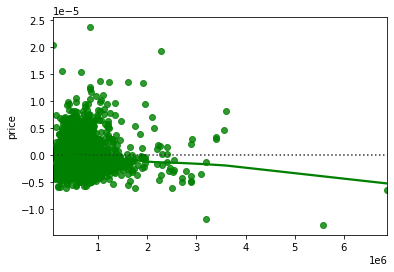

In [78]:
residuals = (y_test - y_pred)
sns.residplot(y_pred, y_test, lowess=True, color='g')

(array([2.000e+00, 1.000e+00, 3.710e+02, 1.762e+03, 1.172e+03, 1.210e+02,
        1.900e+01, 7.000e+00, 1.000e+00, 2.000e+00]),
 array([-1.44429505e-05, -1.06399180e-05, -6.83688559e-06, -3.03385314e-06,
         7.69179314e-07,  4.57221176e-06,  8.37524422e-06,  1.21782767e-05,
         1.59813091e-05,  1.97843416e-05,  2.35873740e-05]),
 <a list of 10 Patch objects>)

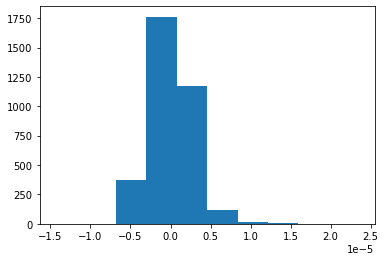

In [79]:
plt.hist(residuals)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=9, test_size=0.2)
selector = SelectKBest(f_regression, k=20)
selector.fit(x_train, y_train)
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]

In [81]:
list(selected_columns)

['log_sqft_liv',
 'grade',
 'lat log_sqft_liv',
 'lat log_sqft_liv15',
 'lat price',
 'lat grade',
 'log_sqft_liv^2',
 'log_sqft_liv log_sqft_liv15',
 'log_sqft_liv price',
 'log_sqft_liv grade',
 'log_sqft_liv bathrooms',
 'log_sqft_liv15 price',
 'log_sqft_liv15 grade',
 'price^2',
 'price grade',
 'price bathrooms',
 'grade^2',
 'grade bathrooms',
 'bathrooms^2',
 'log_sqft_liv']

In [83]:
#instantiate a linear regression object, #fit the linear regression to the data
kbest = LinearRegression()
kbest.fit(x_train[selected_columns], y_train)
y_train_kbest = kbest.predict(x_train[selected_columns])
trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
print('Training Root Mean Squared Error:' , trainK_rmse)
y_kbest = kbest.predict(x_test[selected_columns])
testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 475.1236285213272
Testing Root Mean Squared Error: 442.36587203443804


In [85]:
list(zip(selected_columns, kbest.coef_))
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')


Original:  2.7227589453490462e-06 
 KBest:    442.36587203443804 



In [175]:
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
selector.fit(x_train, y_train)
selected = x_train.columns[selector.support_]
removed = x_train.columns[~selector.support_]
lm = LinearRegression()
lm = lm.fit(x_train[selected], y_train)
y = lm.predict(x_train[selected])
train = np.sqrt(metrics.mean_squared_error(y_train, y))
y_pred = lm.predict(x_test[selected])
test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Root Mean Squared Error:' , train)
print('Testing Root Mean Squared Error:' , test)
print("Original: ", test_rmse, "\n",
      "KBest:   ", testK_rmse, "\n",
      "RFE:     ", test)

Training Root Mean Squared Error: 195811.1195169985
Testing Root Mean Squared Error: 187432.17826324556
Original:  191514.40290102453 
 KBest:    523446894.039649 
 RFE:      187432.17826324556


# Third Model

In [167]:
df3 = df.copy()
df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed
0,365000.0,4,2.25,2070,8893,2.0,0,4,8,2070,98058,47.4388,-122.162,2390,7700,28,0,0,0
1,865000.0,5,3.00,2900,6730,1.0,0,5,8,1830,98115,47.6784,-122.285,2370,6283,37,0,1,0
2,1038000.0,4,2.50,3770,10893,2.0,0,3,11,3770,98006,47.5646,-122.129,3710,9685,17,0,0,1
3,1490000.0,3,3.50,4560,14608,2.0,0,3,12,4560,98034,47.6995,-122.228,4050,14226,25,0,0,1
4,711000.0,3,2.50,2550,5376,2.0,0,3,9,2550,98052,47.6647,-122.083,2250,4050,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,750000.0,5,2.50,3240,9960,1.0,0,3,8,2020,98008,47.5858,-122.112,2730,10400,57,0,1,1
17286,440000.0,2,1.75,1300,4000,2.0,0,3,7,1300,98105,47.6687,-122.288,1350,4013,66,0,0,0
17287,310000.0,3,1.00,1050,9876,1.0,0,3,7,1050,98028,47.7635,-122.262,1760,9403,61,0,0,0
17288,427500.0,3,1.50,1900,43186,1.5,0,4,7,1300,98038,47.4199,-121.990,2080,108028,43,0,1,0


In [168]:
df3['log_sqft_liv'] = np.log(df3.sqft_living)
df3['log_sqft_liv15'] = np.log(df3.sqft_living15)
df3['log_sqft_lot'] = np.log(df3.sqft_lot)
df3['log_sqft_lot15'] = np.log(df3.sqft_lot15)

In [169]:
df3.drop('sqft_above', axis=1, inplace=True)
df3.bedrooms = df3.bedrooms.astype('category')
df3.bathrooms = df3.bathrooms.astype('category')
df3.grade = df3.grade.astype('category')
df3.renovated = df3.renovated.astype('category')
df3.basement = df3.basement.astype('category')
df3.viewed = df3.viewed.astype('category')
df3.drop(['floors', 'condition'], inplace=True, axis=1)

In [ ]:
features = df3[['sqft_above', 'sale_year', ]]
features

In [ ]:
target = df['price']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(features)
poly_columns = poly.get_feature_names(features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

# Final Model

In [107]:
#instantiate a linear regression object
lm_final = LinearRegression()
#fit the linear regression to the data
lm_final = lm_final.fit(features[selected_columns], target)

KeyError: "['lat price', 'log_sqft_liv^2', 'price bathrooms', 'log_sqft_liv15 price', 'lat grade', 'log_sqft_liv', 'lat log_sqft_liv15', 'lat log_sqft_liv', 'price grade', 'log_sqft_liv bathrooms', 'log_sqft_liv15 grade', 'log_sqft_liv log_sqft_liv15', 'grade bathrooms', 'log_sqft_liv grade', 'price^2', 'log_sqft_liv price'] not in index"

In [79]:
lm_final.coef_

array([-2.36956282e+04,  1.73511005e+04, -1.12617809e+04, -3.78350078e-02,
        1.18160091e-01, -7.48147471e-01,  3.04086466e+02, -6.75290751e+02,
        8.37253482e-02, -9.55613607e-01, -3.29756252e-02,  7.60779907e-02,
        4.51008813e+01,  2.19510615e+02, -1.16575356e-01,  8.71207944e+01,
        4.44540510e-01,  8.44635978e+00,  2.67506561e+02,  2.09351280e-02])

## **Pickle**

In [80]:
pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [83]:
pickle_out = open("scaler.pickle", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close

<function BufferedWriter.close>

# Prediction with Holdout Set

In [ ]:
# read csv file
df = pd.read_csv('data/kc_house_data_test_features.csv', index_col=0)


In [ ]:
# data preprocessing
df['sale_date'] = [x[:8] for x in df.date]
df.sale_date = df.sale_date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df.drop(columns='date', inplace=True)
df.drop(['id'], inplace=True, axis=1)
df.replace({'bedrooms': {33: 3}}, inplace=True)
df.replace({'bedrooms': {11: 1}}, inplace=True)
df['sale_age'] = df.sale_date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
df.replace({'sale_age': {-1: 0}}, inplace=True)
df['renovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)
df.drop(['yr_built', 'yr_renovated', 'sale_date', 'sqft_basement', 'view'], inplace=True, axis=1)

In [ ]:
# dummy variables
index_dum = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']].columns
df_dum = pd.get_dummies(data=df, columns=index_dum, drop_first=True, prefix=['bdr', 'bth', 'flr', 'cnd', 'grd'])
# polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_dum)
poly_columns = poly.get_feature_names(df_dum.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [ ]:
# subset identified by K-Best
features = df_poly[['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_living^2',
       'sqft_living sqft_above', 'sqft_living zipcode', 'sqft_living lat',
       'sqft_living long', 'sqft_living sqft_living15', 'sqft_living viewed',
       'sqft_above^2', 'sqft_above zipcode', 'sqft_above lat',
       'sqft_above long', 'sqft_above sqft_living15', 'sqft_above viewed',
       'zipcode sqft_living15', 'lat sqft_living15', 'long sqft_living15',
       'sqft_living15^2']]

In [ ]:
# Scaling
scaler = StandardScaler()
features = pd.DataFrame(data=scaler.fit_transform(features), columns=features.columns)

In [ ]:
# Load pickle
with open('data/model.pickle', 'rb') as file:
    final_answer = pickle.load(file)
final_answers = final_answer.predict(features)

In [ ]:
# Write prediction to CSV file
pd.DataFrame(final_answers, columns=['predictions']).to_csv('housing_preds_Steven_Yan.csv')